# AE1: Implementacja algorytmu genetycznego – opt. f-cji kwadratowej w R³
Adrianna Grudzień


Podstawowy algorytm genetyczny z mutacją gaussowską i krzyżowaniem jednopunktowym. Sprawdzić działanie algorytmu na funkcji x2+y2+2z2 oraz na pięciowymiarowej funkcji Rastrigina. 



Poczynione kroki:
1. Inicjalizacja populacji - N x-ów

In [302]:
import numpy as np
import copy
import matplotlib.pyplot as plt

## Funkcje pomocnicze

In [5]:
def multiply_array(scalar, x):
    x_new = np.zeros(len(x))
    for i in range(len(x)):
        x_new[i] = x[i] + x[i]*scalar
    return x

## Funkcje

In [322]:
def fun1(x):
    'x - array with length=3'
    return np.square(x[0]) + np.square(x[1]) + 2*np.square(x[2])

def rastrigin_fun(x):
    'x - array'
    A = 10
    n = len(x)
    return A*n + np.sum(np.square(x) - multiply_array(A,np.cos(multiply_array(2*np.pi, x))))

def fun2(x):
    '''Funkcja testowa dwuwymiarowa do sprawdzania poprawności algorytmu z wizualizacją 2d'''
    return np.square(x[0]) + np.square(x[1])
def fun3(x):
    '''Funkcja testowa dwuwymiarowa do sprawdzania poprawności algorytmu z wizualizacją 2d'''
    return np.square(x[0]) + np.square(x[1] + 3)

In [371]:
class AE:
    def __init__(self, dim, N, fun=fun1, verbose_step=10):
        self.N = N # liczność popoulacji
        self.dim = dim # wymiar obserwacji
        self.population = np.zeros(shape=(dim, N))
        self._initialize_population()
        self.new_population = copy.deepcopy(self.population) # populacja, do której będą dodawane nowe osobniki
        self.fun = fun
        self.verbose_step = verbose_step
        
        self.minimum_per_epoch = [] # minimalna wartość funkcji w kolejnych iteracjach

        
    def _initialize_population(self):
        for i in range(self.dim):
            for j in range(self.N):
                self.population[i][j] = np.random.uniform(0,1, size=1)
        
         
    def select_radomly_from_population(self):
        '''Losowanie dowolnego osobnika z populacji.'''
        randomCol = np.random.randint(self.N, size=1)
        return self.population[:, randomCol]
         
        
    def cross(self, prob_boundary=0.7):
        '''
        Krzyżowanie. Dla dowolnej długości wektora.
        - losujemy 2 wektory x1, x2 i tworzymy nowego osobnika z połowy wartości x1
        oraz drugiej połowy wartości x2
        '''
        
        drawn_prob = np.random.uniform(0,1) # wylosowane prawdopodobieństwo krzyżowania dla danych osobników
        if drawn_prob <= prob_boundary:
            # losowanie osobników
            x1 = self.select_radomly_from_population()
            x2 = self.select_radomly_from_population()
            # określenie ile wartości z x1, x2 bierzemy do utworzenia nowego osobnika n2=self.dim-n1
            n1 = self.dim//2

            # łączenie osobników
            x_new = np.zeros((self.dim, 1))
            for i in range(x_new.shape[0]):
                if i < n1:
                    x_new[i] = x1[i]
                else:
                    x_new[i] = x2[i]

            # dodanie nowego osobnika do populacji
            self.new_population = np.concatenate((self.new_population, x_new), axis=1)
        
        
    def mutate(self, x, prob_boundary=0.2):
        '''Mutacja gaussowska - wylosowanie zgodnie z rozkładem normalnym 
        przesunięcia wektora w każdym z kierunków
        
        x - mutowany osobnik
        prob_boundary - prawdopodobieństwo mutacji na pojedynczy osobniku (prawd. graniczne)
        '''
    
        drawn_prob = np.random.uniform(0,1) # wylosowane prawdopodobieństwo mutacji dla danego osobnika
        if drawn_prob <= prob_boundary:
            vector_displacement = np.random.normal(0, 1)
            x_new = np.array([x[i]+vector_displacement for i in range(self.dim)]).reshape((self.dim, 1))

            # dodanie nowego osobnika do populacji
            self.new_population = np.concatenate((self.new_population, x_new), axis=1)
        
        
    def count_fun_values(self):
        self.fun_values = []
        for i in range(self.new_population.shape[1]):
            self.fun_values.append(self.fun(self.new_population[:,i]))    
        
    def evaluate(self):
        '''Liczenie wartości funkcji optymalizowanej. Zwraca indeksy osobników o najniższych wartościach fun.'''
        self.count_fun_values()
        min_args = np.argpartition(self.fun_values, self.N)[:self.N]
        return min_args
        
    def select(self):
        '''Algorytm selekcji - w populacji zostawiamy self.N osobników o najniższych wartościach funkcji optymalizowanej.'''
        min_args = self.evaluate()
        self.population = self.new_population[:, min_args]
        
    def show_2d_results(self):
        plt.scatter(x = self.population[0,:], y = self.population[1,:])
        plt.xlim((-3, 3))
        plt.ylim((-3, 3))
        plt.show()
        
    def count_mean_vector(self):
        '''Liczy wartości średnie osobników z populacji.'''
        mean_vec = np.mean(self.population, axis=1)
        
    def fit(self, n_epochs=10):
        '''Tyle krzyżowań i mutacji, ile osobników w populacji'''
        iter = 0
        while iter < n_epochs:
            for i in range(self.N):
                self.cross()
            
            for i in range(self.N):
                x = self.population[:,i]
                self.mutate(x)
            self.select()
            
            if self.dim == 2 and iter%self.verbose_step==0:
                print(iter)
                self.show_2d_results()
                
            if iter%self.verbose_step == 0:
                print(iter)
                self.count_mean_vector()
                
            
            self.minimum_per_epoch.append(np.min(self.fun_values))
            
            iter += 1
            
    def visualize_min(self):
        plt.plot(range(1,len(self.minimum_per_epoch)+1), self.minimum_per_epoch)
        plt.xlabel('epoch number')
        plt.ylabel('minimum value of function of population')
        plt.title('Minimum value of function')
        plt.show()

In [372]:
ae = AE(3, 50, fun1, verbose_step=50)
ae.fit(n_epochs=31)

0


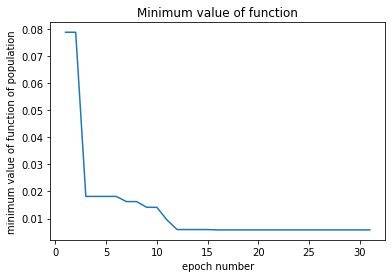

In [373]:
ae.visualize_min()

Obserwacje: Średnie wartości osobników rzeczywiście zbliżają się do punktu minimalnego (0,0). Wniosek: algorytm działa poprawnie.

- funkcja Rastrigina

In [374]:
ae = AE(5, 50, rastrigin_fun, verbose_step=50)
ae.fit(n_epochs=31)

0


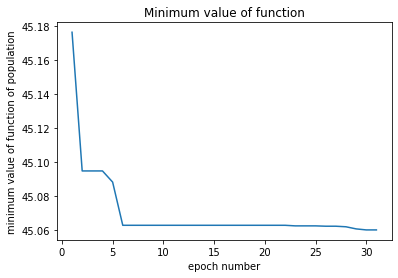

In [375]:
ae.visualize_min()

Funkcja Rastrigina działa. Od pewnego momentu zmiany populacji są tak małe, że aż niezauważalne. Minimum dla pięciu wymiarów wynosi ok. 45.

# Testy dla funkcji dwuwymiarowych
- fun2 (minimum powinno przypadać w (0,0))
- fun3 (minimum powinno przypadać w (-3,0))

0


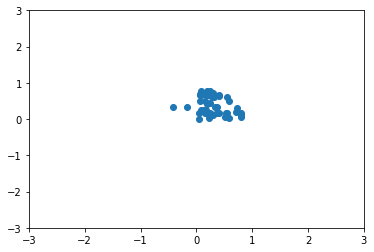

5


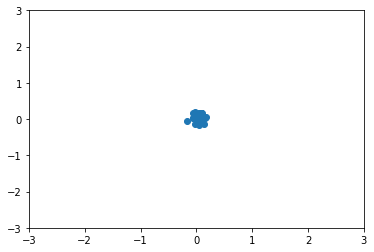

10


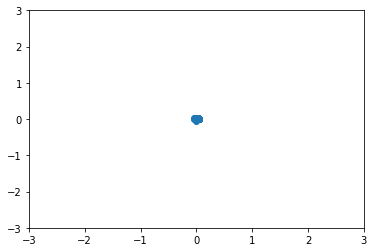

15


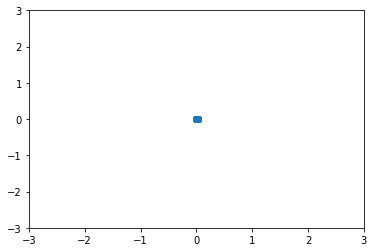

20


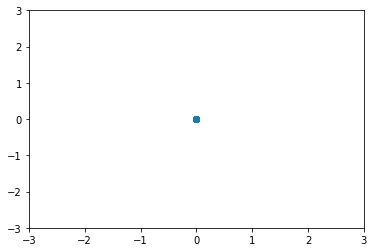

25


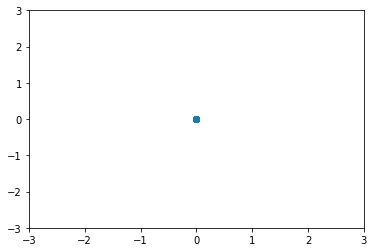

In [327]:
ae = AE(2, 50, fun2)
ae.fit(n_epochs=30)

0


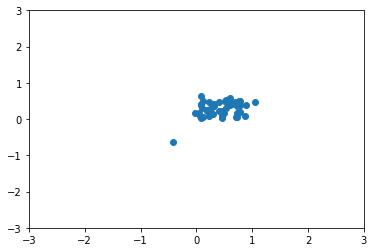

5


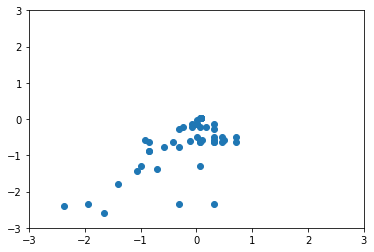

10


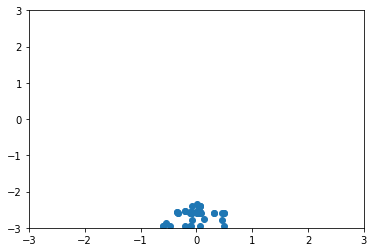

15


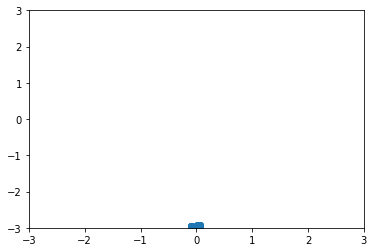

20


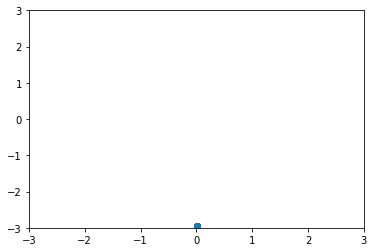

25


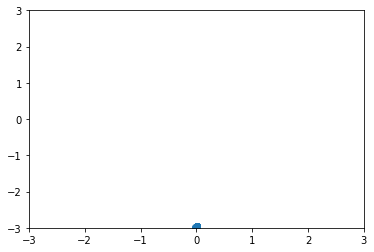

In [326]:
ae = AE(2, 50, fun3)
ae.fit(n_epochs=30)